In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# Display the row's columns and data in dictionary format
first_row = session.query(Measurement).first()
first_row.__dict__


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1cd1c25f7f0>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

# Exploratory Climate Analysis

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database

prev_year_date=dt.date(2017,8,23)-dt.timedelta(days=365)
print(prev_year_date)

2016-08-23


In [14]:
# Perform a query to retrieve the data and precipitation scores

precip = session.query(Measurement.date, Measurement.prcp).\
   filter(Measurement.date > prev_year_date).all()


In [12]:
# Save the query results as a Pandas DataFrame and set the index to the date column

In [15]:
# Save the query results as a Pandas DataFrame and set the index to the date column

precip_df=pd.DataFrame (precip,columns = ['Date','Precipitation'])
precip_df.head()



,Date,Precipitation
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01


In [16]:
# Sort the dataframe by date

precip_df.set_index('Date').sort_values('Date').head()

,Precipitation
Date,
2016-08-24,0.08
2016-08-24,NaN
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15


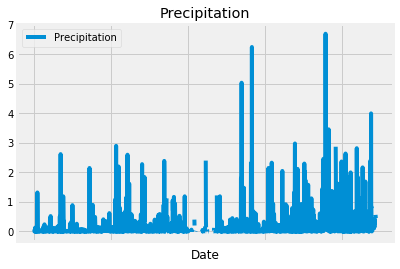

<Figure size 432x288 with 0 Axes>

In [18]:
# Use Pandas Plotting with Matplotlib to plot the data
# plot the dataframe

precip_df.plot('Date','Precipitation')
plt.xlabel("Date")
plt.title("Precipitation")
plt.legend(["Precipitation"])
plt.show()
plt.savefig('precipitation_sk.png')

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [20]:
# Design a query to show how many stations are available in this dataset?
no_stations=session.query(Station.station).count()
print(no_stations)



9


In [21]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active = session.query(Measurement.station,func.count(Measurement.tobs)).group_by (Measurement.station).\
 order_by(func.count(Measurement.tobs).desc()).all()
for a in active:
    print (a)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [22]:
# Finding most active station 
most_active_station=active [0][0]
print(f"Most Active Station: {most_active_station}")

Most Active Station: USC00519281


In [23]:
highest = session.query(Measurement.station,Measurement.date,Measurement.tobs).\
        filter(Measurement.station == 'USC00519281' ).\
        filter(Measurement.date > prev_year_date ).all()
for high in highest:
    print(high)


('USC00519281', '2016-08-24', 77.0)
('USC00519281', '2016-08-25', 80.0)
('USC00519281', '2016-08-26', 80.0)
('USC00519281', '2016-08-27', 75.0)
('USC00519281', '2016-08-28', 73.0)
('USC00519281', '2016-08-29', 78.0)
('USC00519281', '2016-08-30', 77.0)
('USC00519281', '2016-08-31', 78.0)
('USC00519281', '2016-09-01', 80.0)
('USC00519281', '2016-09-02', 80.0)
('USC00519281', '2016-09-03', 78.0)
('USC00519281', '2016-09-04', 78.0)
('USC00519281', '2016-09-05', 78.0)
('USC00519281', '2016-09-06', 73.0)
('USC00519281', '2016-09-07', 74.0)
('USC00519281', '2016-09-08', 80.0)
('USC00519281', '2016-09-09', 79.0)
('USC00519281', '2016-09-10', 77.0)
('USC00519281', '2016-09-11', 80.0)
('USC00519281', '2016-09-12', 76.0)
('USC00519281', '2016-09-13', 79.0)
('USC00519281', '2016-09-14', 75.0)
('USC00519281', '2016-09-15', 79.0)
('USC00519281', '2016-09-16', 78.0)
('USC00519281', '2016-09-17', 79.0)
('USC00519281', '2016-09-18', 78.0)
('USC00519281', '2016-09-19', 78.0)
('USC00519281', '2016-09-20'

In [24]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

highest_df=pd.DataFrame(highest,columns=['station','date','temperature'])
highest_df.head()

,station,date,temperature
0,USC00519281,2016-08-24,77.0
1,USC00519281,2016-08-25,80.0
2,USC00519281,2016-08-26,80.0
3,USC00519281,2016-08-27,75.0
4,USC00519281,2016-08-28,73.0


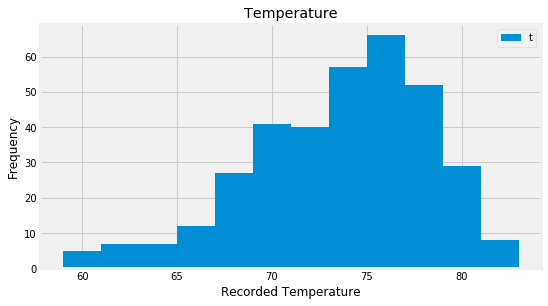

<Figure size 432x288 with 0 Axes>

In [25]:
# plot the temperature data in a histogram with 12 bins
fig = plt.figure(figsize=(8, 4.5))
plt.hist(highest_df['temperature'],12)
plt.xlabel("Recorded Temperature")
plt.ylabel("Frequency")
plt.title("Temperature")
plt.legend("tobs")
plt.show()
plt.savefig('temperature_sk.png')

## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
